In [ ]:
!pip install xgboost

In [15]:
import warnings
warnings.filterwarnings("ignore")
import glob
import re
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pywt import wavedec
import pywt
from scipy.signal import butter, filtfilt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from scipy import signal
from scipy.signal import periodogram

# Define the class labels
class_labels = {
    'yukarı':0 ,
    'yukari': 0,
    'asagi': 1,
    'sag': 2,
    'sol': 3,
    'kirp': 4
}

class_names = {
    0: 'Up',
    1: 'Down',
    2: 'Right',
    3: 'Left',
    4: 'Blink'
}

h=[]
classes=class_labels.keys()

# Define the butter_lowpass_filter function
def butter_bandpass_filter(Input_Signal,LOW_Cutoff,High_cuttOff,Sampling_Rate,order):
    nyq = 0.5 *Sampling_Rate
    low = LOW_Cutoff/ nyq
    high = High_cuttOff / nyq
    Numerator,denominator = butter(order,[low,high],btype = "band",output = "ba",analog = False,fs = None)
    filtered = filtfilt(Numerator,denominator,Input_Signal)
    return filtered

def rsample_filter(Filtered_Data):
    resampled_Signal = []
    for i in Filtered_Data:
        re_Sgnl = signal.resample(i,50)
        resampled_Signal.append(re_Sgnl)
    return resampled_Signal

def extract_raw_features(signal):
    # Compute statistical features
    mean_value = np.mean(signal)
    variance = np.var(signal)
    skewness = scipy.stats.skew(signal)
    kurtosis = scipy.stats.kurtosis(signal)
    # Compute frequency-domain features using FFT
    fft_result = np.fft.fft(signal)
    spectral_power = np.abs(fft_result) ** 2
    return [mean_value, variance, skewness, kurtosis] + list(spectral_power)

def extract_wavelet_features(signal, wavelet='db4', level=3):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    wavelet_features = []
    # Extract statistical features from wavelet coefficients
    for coeff in coeffs:
        mean_value = np.mean(coeff)
        variance = np.var(coeff)
        energy = np.sum(np.square(coeff))
        entropy = -np.sum(np.square(coeff) * np.log(np.square(coeff)))
        wavelet_features.extend([mean_value, variance, energy, entropy])
    
    return wavelet_features

# Open the CSV file for writing
with open('Edata.csv', 'w') as csv_file:
    for filename in glob.glob('C:/Users/AlQla/3-class/*.txt'):
        # Get the class label from the filename
        print(filename)
        h = filename.split('\\')[-1].split('.')[0]
        matches = re.split(r'(\d+)', h)
        print (matches)

        if len(matches)==3:
            print(len(matches))
            if matches[0] in classes :
                if  matches[2]=='h':
                    print(matches[2])
                    f=filename.replace('h','v')
                    try :
                        print(f)
                        with open(f, 'r') as file:
                            # Read the contents of the file and split it into lines
                            lines_v = file.read()
                        lines_v=lines_v.replace('\n',',')
                        for line in lines_v:
                            csv_file.write(line)
                        with open(filename, 'r') as file:
                            # Read the contents of the file and split it into lines
                            lines_h = file.read()
                        lines_h=lines_h.replace('\n',',')
                        for line in lines_h:
                            csv_file.write(line)

                        label = class_labels[matches[0]]
                        csv_file.write(str(label)+'\n')
                    except FileNotFoundError:
                        pass 

# Read the CSV file into a DataFrame
names=np.arange(0,503)
df = pd.read_csv('Edata.csv', names=names)
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

# Apply the butter_lowpass_filter to your data
cutoff = 10  # Choose your cutoff frequency
SamplingRate = 1000  # Provide your sampling rate
order = 5  # Choose the filter order
filtered_Signal = butter_bandpass_filter(x,LOW_Cutoff=0.5,High_cuttOff=20.0,Sampling_Rate=176,order = 2)

res_rsample=rsample_filter(filtered_Signal)


# Extract features
raw_features = np.apply_along_axis(extract_raw_features, 1, res_rsample)
  
wavelet_features= np.apply_along_axis(extract_wavelet_features, 1, res_rsample)

combined_features = np.concatenate((raw_features, wavelet_features), axis=1)

print(combined_features)


# Now you can use these features (raw_features and wavelet_features) for further processing or modeling

C:/Users/AlQla/3-class\asagi10h.txt
['asagi', '10', 'h']
3
h
C:/Users/AlQla/3-class\asagi10v.txt
C:/Users/AlQla/3-class\asagi10v.txt
['asagi', '10', 'v']
3
C:/Users/AlQla/3-class\asagi11h.txt
['asagi', '11', 'h']
3
h
C:/Users/AlQla/3-class\asagi11v.txt
C:/Users/AlQla/3-class\asagi11v.txt
['asagi', '11', 'v']
3
C:/Users/AlQla/3-class\asagi12h.txt
['asagi', '12', 'h']
3
h
C:/Users/AlQla/3-class\asagi12v.txt
C:/Users/AlQla/3-class\asagi12v.txt
['asagi', '12', 'v']
3
C:/Users/AlQla/3-class\asagi13h.txt
['asagi', '13', 'h']
3
h
C:/Users/AlQla/3-class\asagi13v.txt
C:/Users/AlQla/3-class\asagi13v.txt
['asagi', '13', 'v']
3
C:/Users/AlQla/3-class\asagi14h.txt
['asagi', '14', 'h']
3
h
C:/Users/AlQla/3-class\asagi14v.txt
C:/Users/AlQla/3-class\asagi14v.txt
['asagi', '14', 'v']
3
C:/Users/AlQla/3-class\asagi15h.txt
['asagi', '15', 'h']
3
h
C:/Users/AlQla/3-class\asagi15v.txt
C:/Users/AlQla/3-class\asagi15v.txt
['asagi', '15', 'v']
3
C:/Users/AlQla/3-class\asagi16h.txt
['asagi', '16', 'h']
3
h
C:/

[[ 2.07507204e-01  9.71998168e+01 -2.76496047e+00 ...  2.65906906e+01
   8.87705718e+02 -4.39303840e+03]
 [ 2.74348754e-01  7.84450268e+01 -2.89467438e+00 ...  2.15272537e+01
   7.10564487e+02 -3.60740715e+03]
 [ 1.93449725e-01  7.19526029e+01 -3.02720556e+00 ...  6.17766930e+00
   2.17222369e+02 -8.56389523e+02]
 ...
 [ 2.39296501e-01  2.43626861e+02  9.60799425e-02 ...  1.01436460e+01
   3.35723347e+02 -1.23581476e+03]
 [-1.08356942e-01  1.85207815e+02  1.55962794e+00 ...  9.92107912e+00
   3.29230915e+02 -1.45881952e+03]
 [-7.20200439e-01  9.12241342e+01  2.84897414e+00 ...  5.01893765e+00
   1.92130563e+02 -7.28300499e+02]]


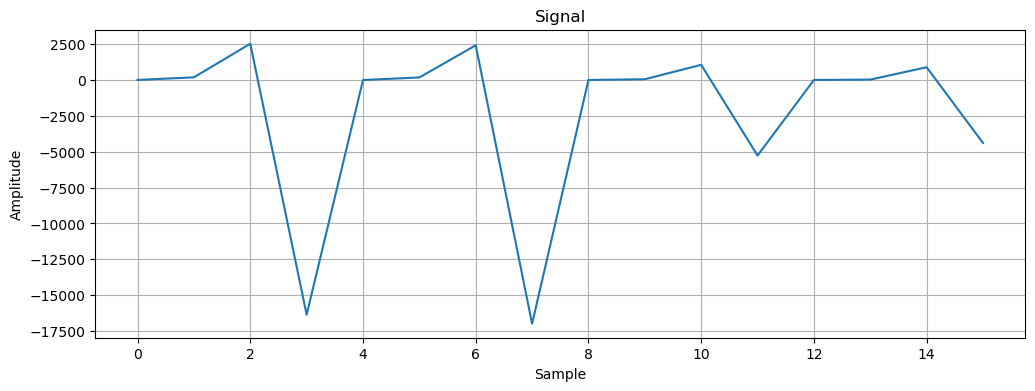

In [34]:
# Assume res_rsample is a 2D numpy array containing your signals
# and that you want to plot the first signal
signal = res_rsample[0]

# Extract wavelet features for the selected signal
we_f = extract_wavelet_features(signal)

# Plot the wavelet features
plt.figure(figsize=(12, 4))
plt.plot(we_f)
plt.title('Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

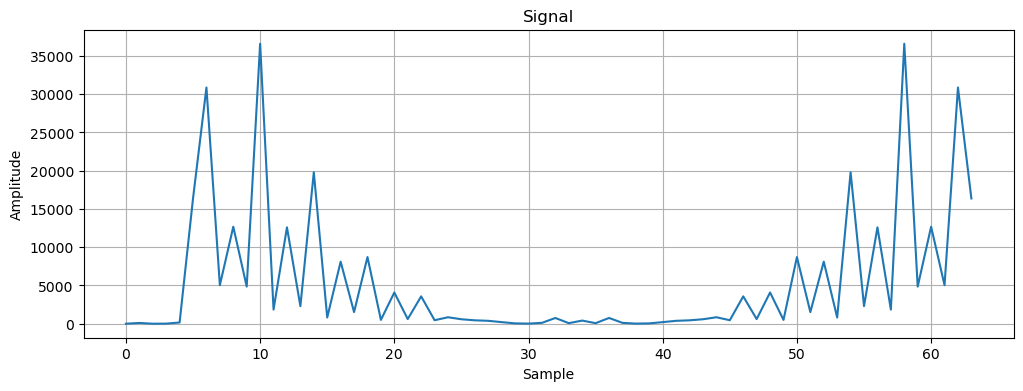

In [33]:
signal = res_rsample[0]

# Extract wavelet features for the selected signal
ra_fe= extract_raw_features(signal)

# Plot the wavelet features
plt.figure(figsize=(12, 4))
plt.plot(ra_fe)
plt.title('Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

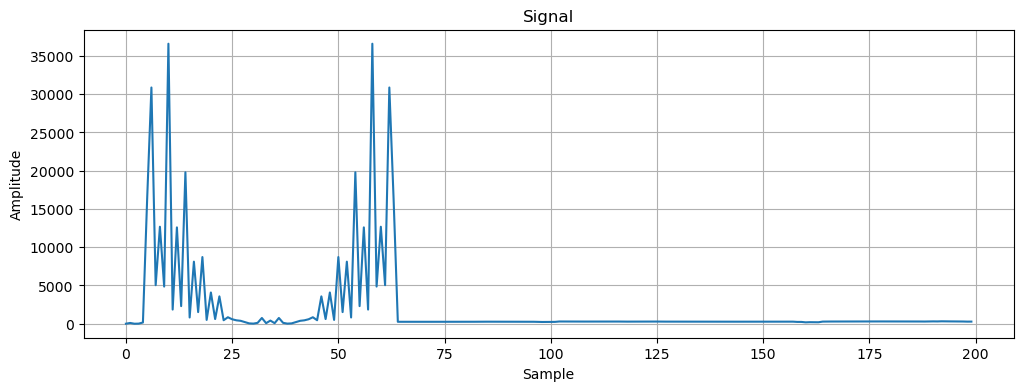

In [32]:
sa = combined_features[0, :]

# Plot the signal
plt.figure(figsize=(12, 4))
plt.plot(sa)
plt.title('Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [16]:
def wavelet_feature_ext(Signal):
    coeffs = wavedec(Signal , 'db4', level = 3)
    featur = pywt.waverec([coeffs[0],coeffs[1]],'db1')
    
    return featur
w_f=wavelet_feature_ext(x)
combined_features = np.concatenate((raw_features, w_f), axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(w_f, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:95.00%
Error: 0.05
[[3 0 0 0 1]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

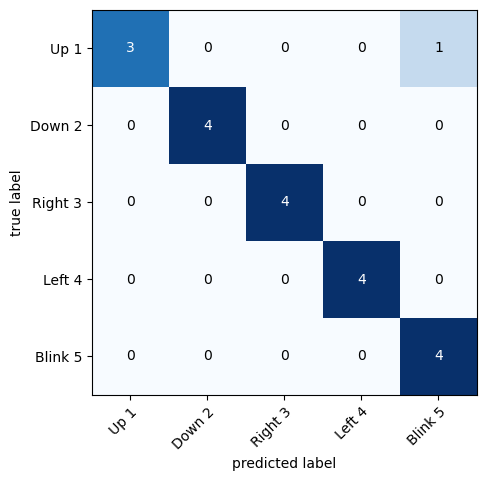

In [18]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# psd extract feature only for test it 


In [20]:
x=np.array(x)
psd=[]
for i in x:
    
    (f,s)=scipy.signal.periodogram(i,176,scaling='density')
    psd.append(s)
print(psd)    

[array([7.00003339e-31, 1.80326182e+01, 1.25615371e+02, 2.53381864e+01,
       1.49379438e+01, 6.15886704e+00, 6.87106739e+01, 4.60159012e+00,
       1.67896178e+01, 5.07288951e+00, 3.38780849e+01, 8.22628628e-01,
       1.31409773e+01, 2.85629240e+00, 1.30767852e+01, 5.84382605e-01,
       7.45608935e+00, 7.23686863e-01, 4.92262564e+00, 9.59686632e-01,
       1.71377381e+00, 6.75480025e-01, 6.95304031e-01, 8.19704178e-01,
       4.83413134e-01, 4.61851844e-02, 4.05319028e-02, 2.54320309e-01,
       1.40873887e+00, 9.06049304e-02, 1.61142099e-01, 2.31015930e-01,
       1.23045331e+00, 7.22754269e-02, 7.07439313e-01, 1.97762898e-01,
       3.31889831e-01, 1.45577148e-01, 1.34754418e+00, 1.53605841e-01,
       2.48248476e-01, 7.79484187e-01, 2.00394376e-01, 2.61767453e-02,
       5.15928266e-02, 1.90345733e-01, 3.93557505e-01, 4.02610641e-02,
       7.89933559e-02, 7.10552418e-02, 3.06797032e-01, 1.40383232e-02,
       2.71345848e-01, 5.22544566e-02, 9.56474696e-02, 2.82348237e-01,
     

In [21]:
X_train, X_test, y_train, y_test = train_test_split(psd, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:80.00%
Error: 0.2
[[3 0 1 0 0]
 [0 3 0 1 0]
 [0 0 3 1 0]
 [0 0 1 3 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

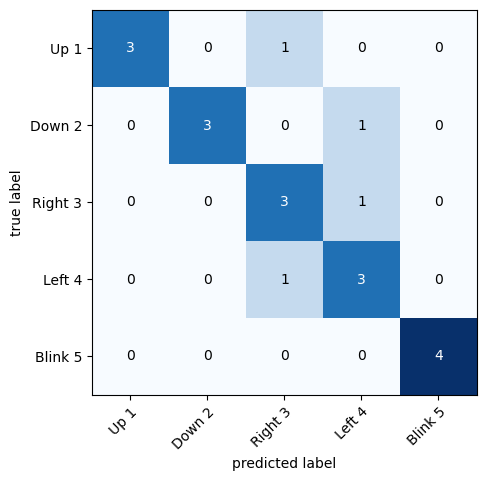

In [22]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

# end

# Compare using raw samples and wavelets coefficients

In [23]:
X_train, X_test, y_train, y_test = train_test_split(raw_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:90.00%
Error: 0.1
[[3 0 0 1 0]
 [0 4 0 0 0]
 [0 0 3 0 1]
 [0 0 0 4 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

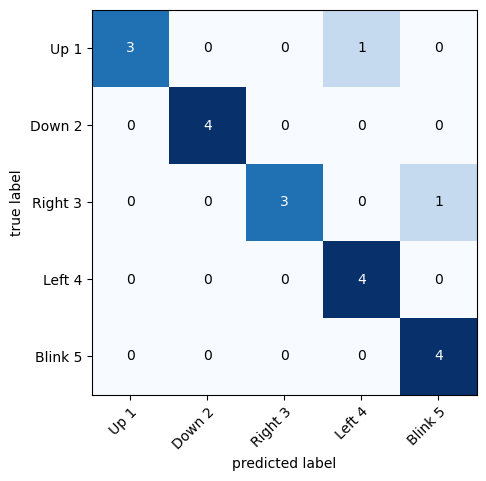

In [24]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wavelet_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:90.00%
Error: 0.1
[[3 0 0 1 0]
 [0 4 0 0 0]
 [0 0 3 0 1]
 [0 0 0 4 0]
 [0 0 0 0 4]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

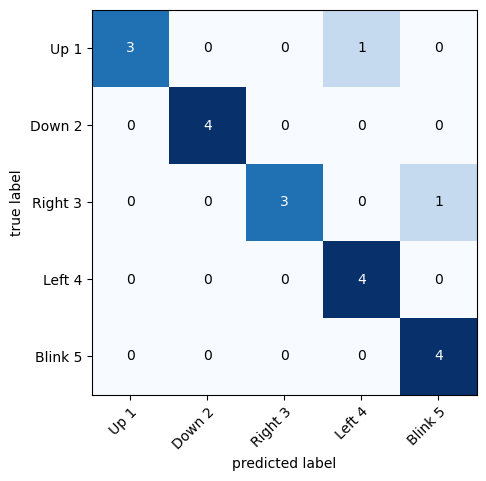

In [25]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy:100.00%
Test Accuracy:90.00%
Error: 0.1
    502
81    0
64    3
86    0
51    2
65    3
32    4
87    0
50    2
20    4
43    2
14    1
42    2
85    0
77    3
10    1
8     1
66    3
29    4
3     1
38    4


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

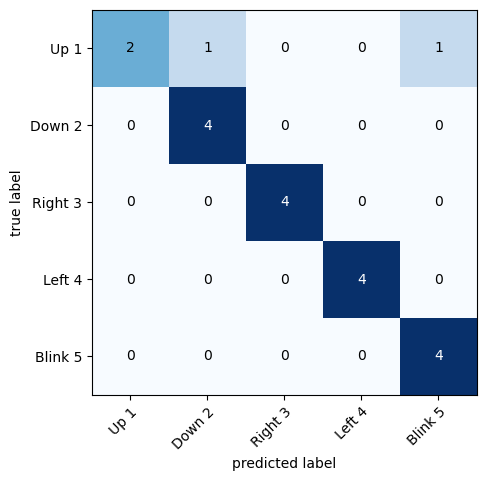

In [27]:
# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel = 'rbf',C = 16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)
print(y_test)
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"], figsize=(12,5))

In [12]:
import pickle
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.20, random_state=40,stratify = y)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Train Accuracy: 100.00%
Test Accuracy: 100.00%
Error: 0.0
[0 3 0 2 3 4 0 2 4 2 1 2 0 3 1 1 3 4 1 4]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

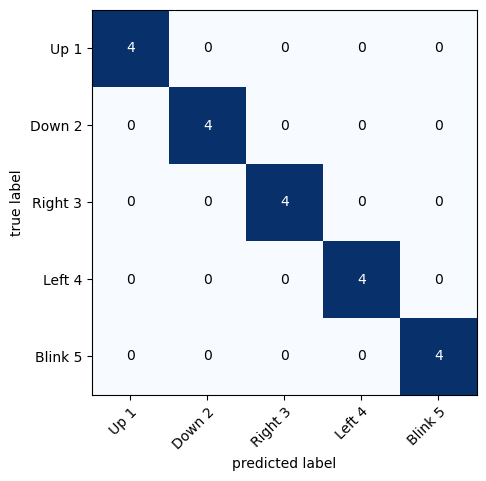

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf_classifier.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)
print(y_test_pred)
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12,5))


Train Accuracy: 100.00%
Test Accuracy: 85.00%
Error: 0.15


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

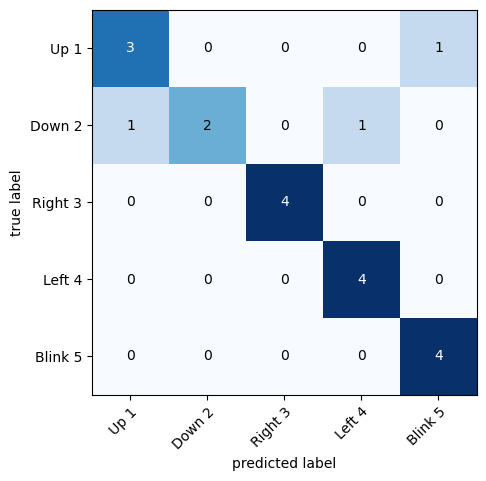

In [30]:
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_classifier.fit(X_train, y_train)

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12,5))

Train Accuracy:100.00%
Test Accuracy:90.00%
Error: 0.1


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

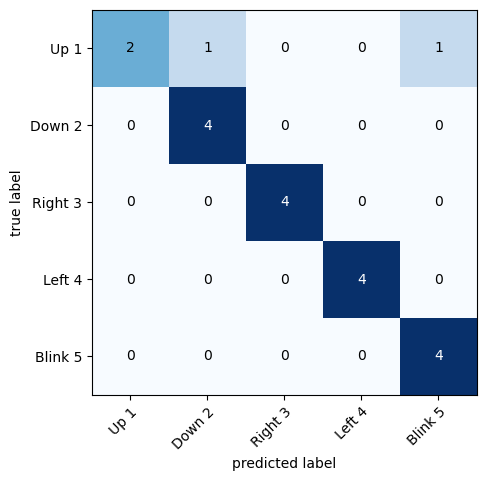

In [31]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel='rbf', C=16)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict using the classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Save predictions to a file
with open('predictions.pkl', 'wb') as file:
    pickle.dump({'train': y_train_pred, 'test': y_test_pred}, file)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12, 5))

In [ ]:
with open('predictions.pkl', 'rb') as file:
    predictions = pickle.load(file)
    

# Print the loaded predictions
print(predictions)

Train Accuracy:100.00%
Test Accuracy:95.00%
Error: 0.05
    502
81    0
64    3
86    0
51    2
65    3
32    4
87    0
50    2
20    4
43    2
14    1
42    2
85    0
77    3
10    1
8     1
66    3
29    4
3     1
38    4
[0 3 3 2 3 4 0 2 4 2 1 2 0 3 1 1 3 4 1 4]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

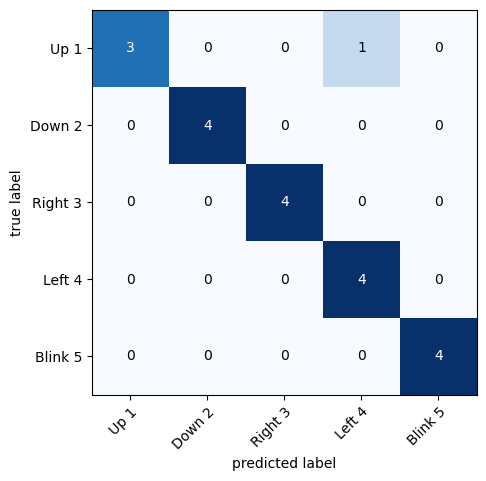

In [13]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the SVC classifier with your desired parameters
svm = SVC(kernel='rbf', C=16)

# # Fit the classifier to the training data
svm.fit(X_train, y_train)
with open('singer.pkl', 'wb') as f:
    pickle.dump(svm, f)

# with open('singer.pkl', 'rb') as f:
#     loaded_svm = pickle.load(f)
# Predict using thsvme classifier
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Save predictions to a file
with open('predictions.pkl', 'wb') as file:
    pickle.dump({'train': y_train_pred, 'test': y_test_pred}, file)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:{:.2%}".format(train_accuracy))
print("Test Accuracy:{:.2%}".format(test_accuracy))
error = abs(round(train_accuracy - test_accuracy, 2))
print("Error:", error)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
print(y_test)
print(y_test_pred)
plot_confusion_matrix(conf_mat, class_names=["Up 1", "Down 2", "Right 3", "Left 4", "Blink 5"], figsize=(12, 5))

In [14]:
import pickle
names=np.arange(0,503)
df = pd.read_csv('test.csv', names=names)
x=df.iloc[:,:-1]
print(x)
with open('scaler.pkl', 'rb') as f:
    scal = pickle.load(f)
    
# Apply the butter_lowpass_filter to your data
cutoff = 10  # Choose your cutoff frequency
SamplingRate = 1000  # Provide your sampling rate
order = 5  # Choose the filter order
filtered_Signal = butter_bandpass_filter(x,LOW_Cutoff=0.5,High_cuttOff=20.0,Sampling_Rate=176,order = 2)
print(filtered_Signal)
re=rsample_filter(filtered_Signal)
print(re)

# Extract features
raw_features = np.apply_along_axis(extract_raw_features, 1, re)
wavelet_features= np.apply_along_axis(extract_wavelet_features, 1, re)
combined_features = np.concatenate((raw_features, wavelet_features), axis=1)
x_testt=scal.transform(combined_features)
print(combined_features)
with open('singer.pkl', 'rb') as f:
    loaded_svm = pickle.load(f)
y_test_pred = loaded_svm.predict(x_testt)
print(y_test_pred)
with open('senario.pkl', 'wb') as file:
    pickle.dump({'test': y_test_pred}, file)

   0    1    2    3    4    5    6    7    8    9    ...  492  493  494  495  \
0  128  121  129  130  118  125  133  127  128  128  ...  142  141  143  141   
1  117  120  118  122  122  118  122  122  119  122  ...  135  133  131  133   
2  122  130  122  131  129  129  121  128  125  117  ...  128  134  130  127   
3  127  127  127  128  129  124  127  130  128  130  ...  128  127  128  126   
4  122  127  125  126  130  128  124  126  127  122  ...  128  126  131  131   
5  137  134  132  137  132  133  137  132  138  133  ...  115  119  114  119   
6  130  128  130  129  132  122  129  132  130  131  ...  133  143  140  130   
7  133  123  131  128  128  125  126  137  127  132  ...  133  123  119  123   

   496  497  498  499  500  501  
0  142  142  143  140  141    0  
1  135  132  133  136  134  132  
2  133  133  126  132  133  138  
3  129  130  127  126  131  143  
4  121  131  132  122  129  122  
5  118  117  115  121  116  141  
6  141  139  131  136  144  173  
7  124 